In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 16

In [3]:
file_name = 'wheat_21_var_3_species'

In [4]:
from enum import Enum

class filter_method(Enum):
    none = 0
    snv = 1
    msc = 2
    savgol = 3

FILT = 2
FILTER = filter_method(FILT).name

# to be set if filter chosen is savgol
WINDOW = 7
ORDER = 2
DERIVATIVE = 1

#will be used for test dataset in msc
reference= None

In [5]:
def dataset_file_name(file_name):
    name = "./dataset/"+str(file_name)
    if FILT != 0:
        name+="_FILTER_"+str(FILTER)
    if FILTER == "savgol":
        name+="_WINDOW_"+str(WINDOW)+"_ORDER_"+str(ORDER)+"_DERIVATIVE_"+str(DERIVATIVE)
    return name

In [6]:
DATASET_FILE_NAME = dataset_file_name(file_name)
X_train_file = DATASET_FILE_NAME+"_train_dataset.npy"
y_train_file = DATASET_FILE_NAME+"_train_dataset_label.npy"
X_test_file = DATASET_FILE_NAME+"_test_dataset.npy"
y_test_file = DATASET_FILE_NAME+"_test_dataset_label.npy"

In [7]:
X_train =  np.load(X_train_file)
y_train =  np.load(y_train_file)
X_test  =  np.load(X_test_file)
y_test  =  np.load(y_test_file)

In [8]:
y_set = set(y_train)

In [9]:
NUM_OF_CLASSES = len(y_set)

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)

(33868, 147, 1)
(8468, 147, 1)


In [11]:
import keras
from keras import Sequential
from keras.layers import Input, Conv1D, Flatten, Dense, MaxPooling1D

In [12]:
def createModel(input_shape,num_classes):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=5, input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=5 ))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    
    return model

In [13]:
model = createModel(X_train.shape[1:],NUM_OF_CLASSES)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 143, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 28, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 1000)              897000    
                                                                 
 dense_1 (Dense)             (None, 3)                 3003      
                                                                 
Total params: 900,195
Trainable params: 900,195
Non-trainable params: 0
__________________________________________________

In [15]:
train_eva = []
test_eva = []

In [16]:
history_dataframe = pd.DataFrame() 

In [17]:
for x in range(400):
    print("\nEpoch: ",x+1)
    history = model.fit(X_train ,y_train ,batch_size=BATCH_SIZE ,epochs=1, verbose=2, shuffle=True)
    if history_dataframe.size == 0:
        history_dataframe = pd.DataFrame.from_dict(history.history)
    else:
        history_dataframe = pd.concat([history_dataframe,pd.DataFrame.from_dict(history.history)],axis=0,ignore_index=True)
    
    print("for training")
    train_eva.append(model.evaluate(X_train,y_train))
    print("for testing")
    test_eva.append(model.evaluate(X_test, y_test))


Epoch:  1
2117/2117 - 31s - loss: 1.0635 - accuracy: 0.4046 - 31s/epoch - 15ms/step
for training
1059/1059 [==============================] - 5s 5ms/step - loss: 1.0398 - accuracy: 0.4438
for testing
265/265 [==============================] - 1s 4ms/step - loss: 1.0540 - accuracy: 0.4410

Epoch:  2
2117/2117 - 31s - loss: 0.9704 - accuracy: 0.5118 - 31s/epoch - 15ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.9108 - accuracy: 0.5599
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.9151 - accuracy: 0.5534

Epoch:  3
2117/2117 - 30s - loss: 0.7993 - accuracy: 0.6433 - 30s/epoch - 14ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.7232 - accuracy: 0.6822
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.7201 - accuracy: 0.6817

Epoch:  4
2117/2117 - 28s - loss: 0.6553 - accuracy: 0.7168 - 28s/epoch - 13ms/step
for training
1059/1059 [=====================

for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.1493 - accuracy: 0.9458
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.1494 - accuracy: 0.9452

Epoch:  30
2117/2117 - 27s - loss: 0.1543 - accuracy: 0.9421 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.1349 - accuracy: 0.9510
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.1341 - accuracy: 0.9516

Epoch:  31
2117/2117 - 27s - loss: 0.1527 - accuracy: 0.9429 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.1407 - accuracy: 0.9473
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.1410 - accuracy: 0.9489

Epoch:  32
2117/2117 - 26s - loss: 0.1495 - accuracy: 0.9439 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.1295 - accuracy: 0.9539
for testing
265/265 [==

1059/1059 [==============================] - 4s 4ms/step - loss: 0.1206 - accuracy: 0.9520
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.1224 - accuracy: 0.9523

Epoch:  58
2117/2117 - 27s - loss: 0.0930 - accuracy: 0.9667 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0819 - accuracy: 0.9716
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.9705

Epoch:  59
2117/2117 - 27s - loss: 0.0887 - accuracy: 0.9680 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0987 - accuracy: 0.9625
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9619

Epoch:  60
2117/2117 - 26s - loss: 0.0886 - accuracy: 0.9678 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0728 - accuracy: 0.9763
for testing
265/265 [===============

1059/1059 [==============================] - 6s 6ms/step - loss: 0.0715 - accuracy: 0.9741
for testing
265/265 [==============================] - 1s 5ms/step - loss: 0.0727 - accuracy: 0.9731

Epoch:  86
2117/2117 - 31s - loss: 0.0595 - accuracy: 0.9788 - 31s/epoch - 15ms/step
for training
1059/1059 [==============================] - 5s 5ms/step - loss: 0.0475 - accuracy: 0.9843
for testing
265/265 [==============================] - 1s 5ms/step - loss: 0.0512 - accuracy: 0.9833

Epoch:  87
2117/2117 - 30s - loss: 0.0590 - accuracy: 0.9791 - 30s/epoch - 14ms/step
for training
1059/1059 [==============================] - 5s 5ms/step - loss: 0.0662 - accuracy: 0.9754
for testing
265/265 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9739

Epoch:  88
2117/2117 - 31s - loss: 0.0594 - accuracy: 0.9786 - 31s/epoch - 14ms/step
for training
1059/1059 [==============================] - 5s 5ms/step - loss: 0.0463 - accuracy: 0.9843
for testing
265/265 [===============

1059/1059 [==============================] - 5s 5ms/step - loss: 0.0337 - accuracy: 0.9892
for testing
265/265 [==============================] - 1s 5ms/step - loss: 0.0354 - accuracy: 0.9881

Epoch:  114
2117/2117 - 31s - loss: 0.0430 - accuracy: 0.9851 - 31s/epoch - 14ms/step
for training
1059/1059 [==============================] - 6s 5ms/step - loss: 0.0287 - accuracy: 0.9909
for testing
265/265 [==============================] - 2s 6ms/step - loss: 0.0332 - accuracy: 0.9893

Epoch:  115
2117/2117 - 32s - loss: 0.0431 - accuracy: 0.9843 - 32s/epoch - 15ms/step
for training
1059/1059 [==============================] - 5s 5ms/step - loss: 0.0599 - accuracy: 0.9771
for testing
265/265 [==============================] - 1s 5ms/step - loss: 0.0719 - accuracy: 0.9732

Epoch:  116
2117/2117 - 31s - loss: 0.0435 - accuracy: 0.9847 - 31s/epoch - 15ms/step
for training
1059/1059 [==============================] - 5s 5ms/step - loss: 0.0357 - accuracy: 0.9882
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0340 - accuracy: 0.9877
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0395 - accuracy: 0.9868

Epoch:  142
2117/2117 - 26s - loss: 0.0344 - accuracy: 0.9879 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0231 - accuracy: 0.9931
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9900

Epoch:  143
2117/2117 - 26s - loss: 0.0332 - accuracy: 0.9883 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0254 - accuracy: 0.9917
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9902

Epoch:  144
2117/2117 - 26s - loss: 0.0384 - accuracy: 0.9859 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0417 - accuracy: 0.9844
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0344 - accuracy: 0.9871
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0417 - accuracy: 0.9850

Epoch:  170
2117/2117 - 28s - loss: 0.0293 - accuracy: 0.9894 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0194 - accuracy: 0.9936
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9911

Epoch:  171
2117/2117 - 27s - loss: 0.0306 - accuracy: 0.9893 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0211 - accuracy: 0.9926
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0286 - accuracy: 0.9906

Epoch:  172
2117/2117 - 29s - loss: 0.0306 - accuracy: 0.9885 - 29s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0243 - accuracy: 0.9919
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0141 - accuracy: 0.9956
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0203 - accuracy: 0.9937

Epoch:  198
2117/2117 - 26s - loss: 0.0262 - accuracy: 0.9908 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0178 - accuracy: 0.9938
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0236 - accuracy: 0.9917

Epoch:  199
2117/2117 - 27s - loss: 0.0272 - accuracy: 0.9902 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0178 - accuracy: 0.9941
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9929

Epoch:  200
2117/2117 - 26s - loss: 0.0256 - accuracy: 0.9907 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0170 - accuracy: 0.9939
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0298 - accuracy: 0.9892
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9869

Epoch:  226
2117/2117 - 26s - loss: 0.0245 - accuracy: 0.9911 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0222 - accuracy: 0.9917
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy: 0.9906

Epoch:  227
2117/2117 - 26s - loss: 0.0235 - accuracy: 0.9912 - 26s/epoch - 12ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0267 - accuracy: 0.9898
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0378 - accuracy: 0.9859

Epoch:  228
2117/2117 - 27s - loss: 0.0236 - accuracy: 0.9918 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0391 - accuracy: 0.9851
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0208 - accuracy: 0.9921
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9884

Epoch:  254
2117/2117 - 27s - loss: 0.0207 - accuracy: 0.9929 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0141 - accuracy: 0.9950
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0228 - accuracy: 0.9924

Epoch:  255
2117/2117 - 27s - loss: 0.0208 - accuracy: 0.9926 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0133 - accuracy: 0.9951
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0208 - accuracy: 0.9932

Epoch:  256
2117/2117 - 27s - loss: 0.0197 - accuracy: 0.9931 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0173 - accuracy: 0.9941
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0218 - accuracy: 0.9918
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0287 - accuracy: 0.9904

Epoch:  282
2117/2117 - 27s - loss: 0.0186 - accuracy: 0.9931 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0100 - accuracy: 0.9970
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9932

Epoch:  283
2117/2117 - 28s - loss: 0.0183 - accuracy: 0.9934 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0140 - accuracy: 0.9949
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0236 - accuracy: 0.9926

Epoch:  284
2117/2117 - 27s - loss: 0.0183 - accuracy: 0.9933 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0140 - accuracy: 0.9950
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0079 - accuracy: 0.9975
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0171 - accuracy: 0.9947

Epoch:  310
2117/2117 - 27s - loss: 0.0165 - accuracy: 0.9943 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0161 - accuracy: 0.9944
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0267 - accuracy: 0.9916

Epoch:  311
2117/2117 - 27s - loss: 0.0151 - accuracy: 0.9944 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0187 - accuracy: 0.9926
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0336 - accuracy: 0.9888

Epoch:  312
2117/2117 - 27s - loss: 0.0164 - accuracy: 0.9939 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0070 - accuracy: 0.9978
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0096 - accuracy: 0.9968
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0224 - accuracy: 0.9927

Epoch:  338
2117/2117 - 27s - loss: 0.0148 - accuracy: 0.9950 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0166 - accuracy: 0.9942
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0243 - accuracy: 0.9922

Epoch:  339
2117/2117 - 27s - loss: 0.0162 - accuracy: 0.9939 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0109 - accuracy: 0.9957
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9929

Epoch:  340
2117/2117 - 27s - loss: 0.0137 - accuracy: 0.9951 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0154 - accuracy: 0.9942
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0092 - accuracy: 0.9970
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0199 - accuracy: 0.9929

Epoch:  366
2117/2117 - 28s - loss: 0.0125 - accuracy: 0.9959 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0116 - accuracy: 0.9953
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0245 - accuracy: 0.9916

Epoch:  367
2117/2117 - 27s - loss: 0.0136 - accuracy: 0.9950 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0183 - accuracy: 0.9929
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0356 - accuracy: 0.9880

Epoch:  368
2117/2117 - 27s - loss: 0.0129 - accuracy: 0.9953 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0130 - accuracy: 0.9948
for testing
265/265 [============

1059/1059 [==============================] - 5s 5ms/step - loss: 0.0096 - accuracy: 0.9963
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0228 - accuracy: 0.9924

Epoch:  394
2117/2117 - 28s - loss: 0.0114 - accuracy: 0.9960 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0043 - accuracy: 0.9986
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0167 - accuracy: 0.9948

Epoch:  395
2117/2117 - 27s - loss: 0.0139 - accuracy: 0.9949 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0066 - accuracy: 0.9976
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9930

Epoch:  396
2117/2117 - 27s - loss: 0.0111 - accuracy: 0.9961 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0078 - accuracy: 0.9975
for testing
265/265 [============

In [18]:
history_dataframe

,loss,accuracy
0,1.063516,0.404630
1,0.970353,0.511781
2,0.799315,0.643262
3,0.655318,0.716842
4,0.548817,0.769635
...,...,...
395,0.011066,0.996103
396,0.013129,0.995482
397,0.013209,0.995040
398,0.011636,0.996043


In [19]:
train_eva_df = pd.DataFrame(train_eva,columns=['loss','accuracy'])
test_eva_df = pd.DataFrame(test_eva,columns=['loss','accuracy'])

In [20]:
def plot_graph(df,title,xlabel,ylabel,values=['loss'],legends=[]):
    
    for value in values:
        epoch_count = range(1, len(df.index) + 1)
        plt.plot(epoch_count, df[value].tolist())
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if legends==[]:
        legends = values
    plt.legend(legends, loc='upper left')
    plt.show()

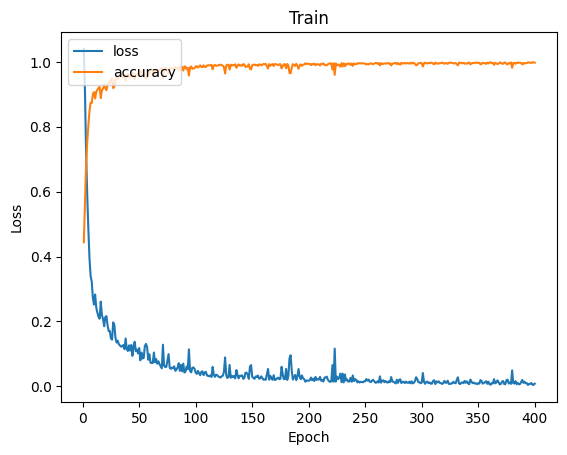

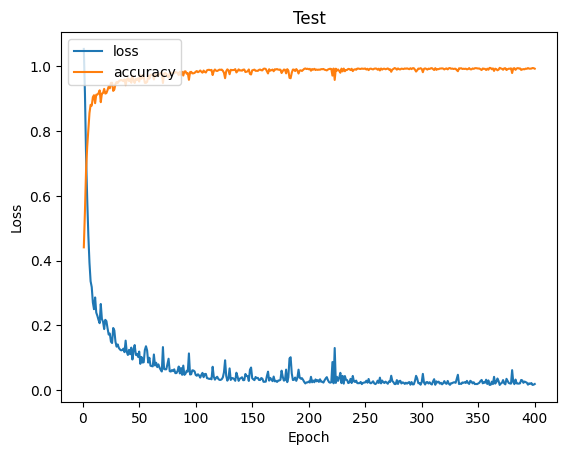

In [21]:
plot_graph(train_eva_df,'Train','Epoch','Loss',['loss','accuracy'])
plot_graph(test_eva_df,'Test','Epoch','Loss',['loss','accuracy'])

In [22]:
train_eva_df['accuracy'].max()

0.9987008571624756

In [23]:
train_eva_df.idxmax()

loss          0
accuracy    397
dtype: int64

In [24]:
test_eva_df['accuracy'].max()

0.9955125451087952

In [25]:
test_eva_df.idxmax()

loss          0
accuracy    368
dtype: int64

In [26]:
for x in range(400,600):
    print("\nEpoch: ",x+1)
    history = model.fit(X_train ,y_train ,batch_size=BATCH_SIZE ,epochs=1, verbose=2, shuffle=True)
    if history_dataframe.size == 0:
        history_dataframe = pd.DataFrame.from_dict(history.history)
    else:
        history_dataframe = pd.concat([history_dataframe,pd.DataFrame.from_dict(history.history)],axis=0,ignore_index=True)
    
    print("for training")
    train_eva.append(model.evaluate(X_train,y_train))
    print("for testing")
    test_eva.append(model.evaluate(X_test, y_test))


Epoch:  401
2117/2117 - 27s - loss: 0.0122 - accuracy: 0.9955 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0049 - accuracy: 0.9986
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0160 - accuracy: 0.9954

Epoch:  402
2117/2117 - 27s - loss: 0.0124 - accuracy: 0.9956 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0452 - accuracy: 0.9851
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0680 - accuracy: 0.9803

Epoch:  403
2117/2117 - 27s - loss: 0.0121 - accuracy: 0.9957 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0085 - accuracy: 0.9974
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0185 - accuracy: 0.9944

Epoch:  404
2117/2117 - 27s - loss: 0.0124 - accuracy: 0.9954 - 27s/epoch - 13ms/step
for training
1059/1059 [=============

for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0096 - accuracy: 0.9964
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.9937

Epoch:  430
2117/2117 - 27s - loss: 0.0104 - accuracy: 0.9962 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0054 - accuracy: 0.9981
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0192 - accuracy: 0.9942

Epoch:  431
2117/2117 - 27s - loss: 0.0111 - accuracy: 0.9958 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0043 - accuracy: 0.9987
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0176 - accuracy: 0.9941

Epoch:  432
2117/2117 - 27s - loss: 0.0114 - accuracy: 0.9958 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0040 - accuracy: 0.9986
for testing
265/265 

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0286 - accuracy: 0.9894
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.9838

Epoch:  458
2117/2117 - 27s - loss: 0.0101 - accuracy: 0.9965 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0153 - accuracy: 0.9939
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9894

Epoch:  459
2117/2117 - 27s - loss: 0.0085 - accuracy: 0.9971 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0139 - accuracy: 0.9946
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9887

Epoch:  460
2117/2117 - 27s - loss: 0.0104 - accuracy: 0.9959 - 27s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0043 - accuracy: 0.9986
for testing
265/265 [============

1059/1059 [==============================] - 4s 4ms/step - loss: 0.0108 - accuracy: 0.9961
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0271 - accuracy: 0.9920

Epoch:  486
2117/2117 - 28s - loss: 0.0108 - accuracy: 0.9964 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0117 - accuracy: 0.9955
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.9910

Epoch:  487
2117/2117 - 28s - loss: 0.0096 - accuracy: 0.9966 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0086 - accuracy: 0.9969
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0238 - accuracy: 0.9934

Epoch:  488
2117/2117 - 28s - loss: 0.0087 - accuracy: 0.9968 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 4s 4ms/step - loss: 0.0067 - accuracy: 0.9978
for testing
265/265 [============

1059/1059 [==============================] - 5s 4ms/step - loss: 0.0030 - accuracy: 0.9993
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0182 - accuracy: 0.9939

Epoch:  514
2117/2117 - 28s - loss: 0.0086 - accuracy: 0.9973 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0044 - accuracy: 0.9985
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0185 - accuracy: 0.9949

Epoch:  515
2117/2117 - 28s - loss: 0.0084 - accuracy: 0.9972 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0051 - accuracy: 0.9984
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9946

Epoch:  516
2117/2117 - 28s - loss: 0.0094 - accuracy: 0.9965 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0025 - accuracy: 0.9994
for testing
265/265 [============

1059/1059 [==============================] - 5s 5ms/step - loss: 0.0041 - accuracy: 0.9988
for testing
265/265 [==============================] - 1s 5ms/step - loss: 0.0181 - accuracy: 0.9952

Epoch:  542
2117/2117 - 28s - loss: 0.0078 - accuracy: 0.9973 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0024 - accuracy: 0.9992
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9952

Epoch:  543
2117/2117 - 28s - loss: 0.0093 - accuracy: 0.9964 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0021 - accuracy: 0.9996
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0154 - accuracy: 0.9961

Epoch:  544
2117/2117 - 28s - loss: 0.0092 - accuracy: 0.9966 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0039 - accuracy: 0.9989
for testing
265/265 [============

1059/1059 [==============================] - 5s 4ms/step - loss: 0.0017 - accuracy: 0.9996
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0155 - accuracy: 0.9956

Epoch:  570
2117/2117 - 28s - loss: 0.0079 - accuracy: 0.9970 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0114 - accuracy: 0.9953
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9900

Epoch:  571
2117/2117 - 28s - loss: 0.0071 - accuracy: 0.9973 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0021 - accuracy: 0.9994
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0172 - accuracy: 0.9950

Epoch:  572
2117/2117 - 28s - loss: 0.0089 - accuracy: 0.9970 - 28s/epoch - 13ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0077 - accuracy: 0.9972
for testing
265/265 [============

1059/1059 [==============================] - 5s 4ms/step - loss: 0.0259 - accuracy: 0.9898
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0548 - accuracy: 0.9822

Epoch:  598
2117/2117 - 29s - loss: 0.0063 - accuracy: 0.9979 - 29s/epoch - 14ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0054 - accuracy: 0.9984
for testing
265/265 [==============================] - 1s 4ms/step - loss: 0.0185 - accuracy: 0.9954

Epoch:  599
2117/2117 - 29s - loss: 0.0078 - accuracy: 0.9975 - 29s/epoch - 14ms/step
for training
1059/1059 [==============================] - 5s 4ms/step - loss: 0.0093 - accuracy: 0.9966
for testing
265/265 [==============================] - 1s 5ms/step - loss: 0.0266 - accuracy: 0.9927

Epoch:  600
2117/2117 - 29s - loss: 0.0093 - accuracy: 0.9972 - 29s/epoch - 14ms/step
for training
1059/1059 [==============================] - 5s 5ms/step - loss: 0.0041 - accuracy: 0.9984
for testing
265/265 [============

In [27]:
train_eva_df = pd.DataFrame(train_eva,columns=['loss','accuracy'])
test_eva_df = pd.DataFrame(test_eva,columns=['loss','accuracy'])

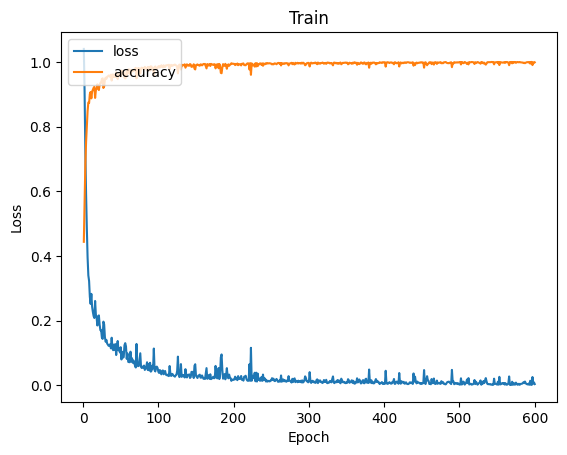

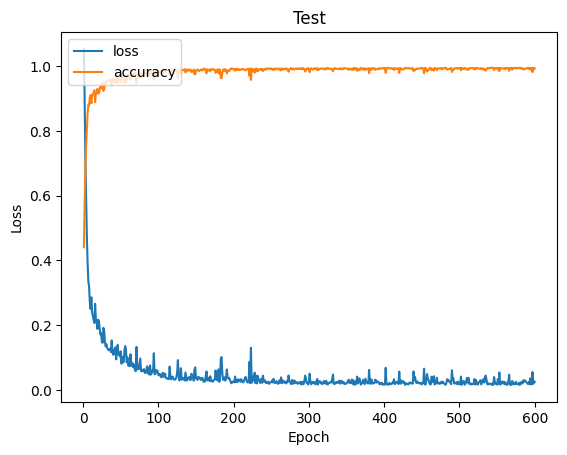

In [28]:
plot_graph(train_eva_df,'Train','Epoch','Loss',['loss','accuracy'])
plot_graph(test_eva_df,'Test','Epoch','Loss',['loss','accuracy'])

In [29]:
train_eva_df['accuracy'].max()

0.9996752142906189

In [30]:
train_eva_df.idxmax()

loss          0
accuracy    595
dtype: int64

In [31]:
test_eva_df['accuracy'].max()

0.9961029887199402

In [32]:
test_eva_df.idxmax()

loss          0
accuracy    542
dtype: int64